# Exact

### Build Quantum Circuit

In [1]:
from qiskit import QuantumCircuit
from numpy import pi

In [2]:
def make_circuit(num):

    circuit = QuantumCircuit(6, 6)
    
    for i in range (3):
        circuit.rx(-pi/2, i)
    for i in range (3, 6):
        circuit.rx(pi/2, i)

    circuit.barrier()

    for i in range(num):
        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.rx(-0.2, 1)
        circuit.rz(-0.2, 2)
        circuit.rx(-0.2, 3)
        circuit.rz(-0.2, 4)

        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.cx(0, 1)
        circuit.cx(2, 3)
        circuit.cx(4, 5)

        circuit.rx(-0.4, 0)
        circuit.rz(-0.4, 1)
        circuit.rx(-0.4, 2)
        circuit.rz(-0.4, 3)
        circuit.rx(-0.4, 4)
        circuit.rz(-0.4, 5)

        circuit.cx(0, 1)
        circuit.cx(2, 3)
        circuit.cx(4, 5)

        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.rx(-0.2, 1)
        circuit.rz(-0.2, 2)
        circuit.rx(-0.2, 3)
        circuit.rz(-0.2, 4)

        circuit.cx(1, 2)
        circuit.cx(3, 4)

        circuit.barrier()

    for i in range(6):
        circuit.rx(-pi/2, i)


    circuit.measure(5, 5)

    
    return circuit

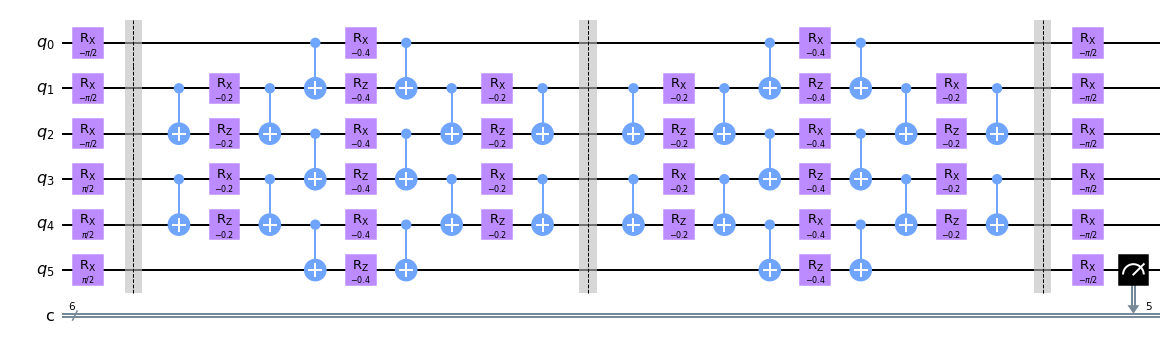

In [3]:
# check circuit
circ = make_circuit(2)
circ.draw('mpl')

### Execute Quantum Circuit

In [4]:
from qiskit import Aer, execute
from tqdm import notebook

simulator = Aer.get_backend('qasm_simulator')

In [5]:
x = []
y = []

for i in notebook.tqdm(range(16)):
    circuit = make_circuit(i)
    
    shots = 5000
    result = execute(circuit, backend= simulator, shots = shots).result()
    counts = result.get_counts()
    prob_000000 = counts['000000'] / shots
    try:
        prob_100000 = counts['100000'] / shots
    except:
        prob_100000 = 0
    
    prob_tot = prob_000000 - prob_100000
    
    x.append(i*0.2)
    y.append(prob_tot)

  0%|          | 0/16 [00:00<?, ?it/s]

### Result

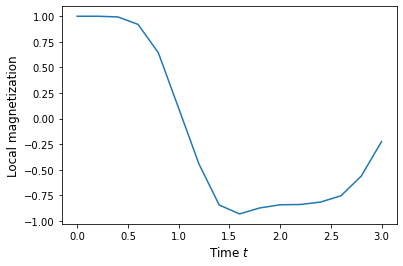

In [6]:
from matplotlib import pyplot as plt

plt.plot(x, y)
plt.xlabel(r'Time $t$', fontsize="12")
plt.ylabel(r'Local magnetization', fontsize="12")

plt.show()

In [7]:
# save
import numpy as np
np.save('./exact',y)